In [21]:
#allow output from every line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Reading in Cy Young Voting Data
cy_young_voting = pd.read_csv("CyYoungVoting.csv")
cy_young_voting

#Reading in Lahman Pitching Data and Selecting Columns Needed for Future Analysis
pitching = pd.read_csv("Pitching.csv")
pitching = pitching[['playerID', 'yearID', 'teamID', 'lgID', 'W', 'G', 'GS', 'CG', 'SV', 'IPouts', 'H', 'HR', 'BB', 'SO', 'BAOpp', 'ERA']]
pitching

,Name,playerID,yearID,VotePoints
0,Justin Verlander,verlaju01,2019,171
1,Jacob deGrom,degroja01,2019,207
2,Blake Snell,snellbl01,2018,169
3,Jacob deGrom,degroja01,2018,207
4,Corey Kluber,klubeco01,2017,204
5,Max Scherzer,scherma01,2017,201
6,Rick Porcello,porceri01,2016,137
7,Max Scherzer,scherma01,2016,192
8,Dallas Keuchel,keuchda01,2015,186
9,Jake Arrieta,arrieja01,2015,169


,playerID,yearID,teamID,lgID,W,G,GS,CG,SV,IPouts,H,HR,BB,SO,BAOpp,ERA
0,aardsda01,2004,SFN,NL,1,11,0,0,0,32,20,1,10,5,0.417,6.75
1,aardsda01,2006,CHN,NL,3,45,0,0,0,159,41,9,28,49,0.214,4.08
2,aardsda01,2007,CHA,AL,2,25,0,0,0,97,39,4,17,36,0.300,6.40
3,aardsda01,2008,BOS,AL,4,47,0,0,0,146,49,4,35,49,0.268,5.55
4,aardsda01,2009,SEA,AL,3,73,0,0,38,214,49,4,34,80,0.190,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51363,zuverge01,1958,BAL,AL,2,45,0,0,7,207,74,4,17,22,0.280,3.39
51364,zuverge01,1959,BAL,AL,0,6,0,0,0,39,15,1,6,1,0.300,4.15
51365,zychto01,2015,SEA,AL,0,13,1,0,0,55,17,1,3,24,0.239,2.45
51366,zychto01,2016,SEA,AL,1,12,0,0,0,41,10,0,10,21,0.208,3.29


In [33]:
#Joining Together Cy Young Voting and Lahman Data from 2010-2019 Winners
cy_young_stats = pd.merge(cy_young_voting, pitching, on=["playerID", "yearID"], how="left")

#Converting the IPouts column to IP and then Dropping it from DataFrame
cy_young_stats['IP'] = (cy_young_stats.IPouts/3).round(2)
cy_young_stats = cy_young_stats.drop(columns="IPouts")

#Adding a WHIP column 
cy_young_stats['WHIP'] = ((cy_young_stats.BB + cy_young_stats.H) / cy_young_stats.IP).round(2)

#Adding H/9, HR/9, BB/9, K/9 columns
cy_young_stats['H/9'] = ((cy_young_stats.H / cy_young_stats.IP) * 9).round(2)
cy_young_stats['HR/9'] = ((cy_young_stats.HR / cy_young_stats.IP) * 9).round(2)
cy_young_stats['BB/9'] = ((cy_young_stats.BB / cy_young_stats.IP) * 9).round(2)
cy_young_stats['K/9'] = ((cy_young_stats.SO / cy_young_stats.IP) * 9).round(2)
cy_young_stats

,Name,playerID,yearID,VotePoints,teamID,lgID,W,G,GS,CG,...,BB,SO,BAOpp,ERA,IP,WHIP,H/9,HR/9,BB/9,K/9
0,Justin Verlander,verlaju01,2019,171,HOU,AL,21,34,34,2,...,42,300,0.172,2.58,223.00,0.80,5.53,1.45,1.70,12.11
1,Jacob deGrom,degroja01,2019,207,NYN,NL,11,32,32,0,...,44,255,0.207,2.43,204.00,0.97,6.79,0.84,1.94,11.25
2,Blake Snell,snellbl01,2018,169,TBA,AL,21,31,31,0,...,64,221,0.178,1.89,180.67,0.97,5.58,0.80,3.19,11.01
3,Jacob deGrom,degroja01,2018,207,NYN,NL,10,32,32,1,...,46,269,0.196,1.70,217.00,0.91,6.30,0.41,1.91,11.16
4,Corey Kluber,klubeco01,2017,204,CLE,AL,18,29,29,5,...,36,265,0.193,2.25,203.67,0.87,6.23,0.93,1.59,11.71
5,Max Scherzer,scherma01,2017,201,WAS,NL,16,31,31,2,...,55,268,0.178,2.51,200.67,0.90,5.65,0.99,2.47,12.02
6,Rick Porcello,porceri01,2016,137,BOS,AL,22,33,33,3,...,32,189,0.230,3.15,223.00,1.01,7.79,0.93,1.29,7.63
7,Max Scherzer,scherma01,2016,192,WAS,NL,20,34,34,1,...,56,284,0.199,2.96,228.33,0.97,6.50,1.22,2.21,11.19
8,Dallas Keuchel,keuchda01,2015,186,HOU,AL,20,33,33,3,...,51,216,0.217,2.48,232.00,1.02,7.18,0.66,1.98,8.38
9,Jake Arrieta,arrieja01,2015,169,CHN,NL,22,33,33,4,...,48,236,0.185,1.77,229.00,0.86,5.90,0.39,1.89,9.28


Text(0.5, 0.98, 'VotePoints vs Various Box Score Stats Among 2010-19 Cy Young Award Winners')

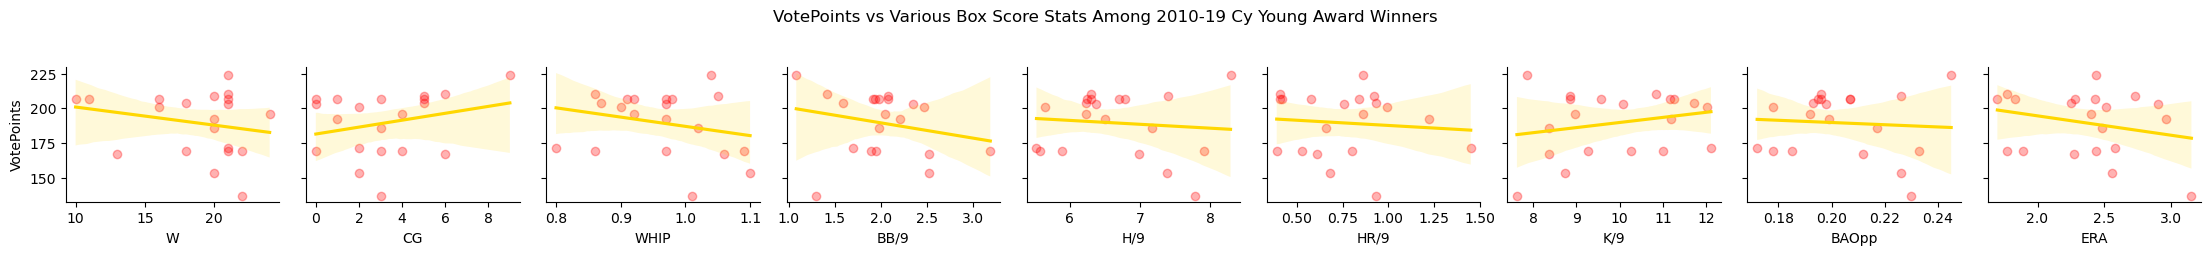

In [41]:
#Creating a ScatterPlot Matrix to Determine Which Stats Have a Potentially Strong Relationship with Vote Points
cy_young_stats_selected = cy_young_stats[['VotePoints', 'W', 'CG', 'WHIP', 'BB/9', 'H/9', 'HR/9', 'K/9', 'BAOpp', 'ERA']]
cy_young_scatterplot_matrix = sns.pairplot(cy_young_stats_selected, diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'gold'}, 
                                                                                                           'scatter_kws':{'alpha':0.3, 'color':'red'}},
                                          x_vars=['W', 'CG', 'WHIP', 'BB/9', 'H/9', 'HR/9', 'K/9', 'BAOpp', 'ERA'],
                                          y_vars=['VotePoints'])
cy_young_scatterplot_matrix.fig.suptitle("VotePoints vs Various Box Score Stats Among 2010-19 Cy Young Award Winners")
cy_young_scatterplot_matrix.fig.subplots_adjust(top=0.75)
cy_young_scatterplot_matrix.fig.savefig("CyYoung_ScatterPlot_Matrix.pdf")

In [51]:
#Selecting Stats that Seem Correlated Based on Matrix Visualization and Finding the Pearson Correlation with Vote Points
cy_young_correlated_stats = cy_young_stats_selected[['VotePoints', 'CG', 'WHIP', 'BB/9', 'K/9', 'ERA']]
cy_young_correlation_matrix = cy_young_correlated_stats.corr()
cy_young_correlation_matrix
vote_points_correlations = cy_young_correlation_matrix[['VotePoints']]
vote_points_correlations

,VotePoints,CG,WHIP,BB/9,K/9,ERA
VotePoints,1.000000,0.255848,-0.241478,-0.229253,0.229980,-0.251354
CG,0.255848,1.000000,0.117602,-0.547781,-0.482941,-0.143954
WHIP,-0.241478,0.117602,1.000000,0.217061,-0.601961,0.397078
BB/9,-0.229253,-0.547781,0.217061,1.000000,0.194479,-0.073879
K/9,0.229980,-0.482941,-0.601961,0.194479,1.000000,-0.180542
ERA,-0.251354,-0.143954,0.397078,-0.073879,-0.180542,1.000000


,VotePoints
VotePoints,1.000000
CG,0.255848
WHIP,-0.241478
BB/9,-0.229253
K/9,0.229980
ERA,-0.251354


In [79]:
#Doing a Rank Analysis According to Box Score Stats to Determine who was the "Most Dominant" Cy Young of the 2010s
#Selecting Stats to Be Ranked
cy_young_stats_ranked = cy_young_stats[['yearID', 'VotePoints', 'CG', 'WHIP', 'BB/9', 'H/9', 'HR/9', 'K/9', 'BAOpp', 'ERA']]
cy_young_stats_ranked.index = cy_young_stats.Name

#Ranking the Players in terms of each stat and Allowing Ties
cy_young_stats_ranked['CG_Rank'] = cy_young_stats_ranked.CG.rank(ascending = False)
cy_young_stats_ranked['WHIP_Rank'] = cy_young_stats_ranked.WHIP.rank(ascending = True)
cy_young_stats_ranked['BB/9_Rank'] = cy_young_stats_ranked['BB/9'].rank(ascending = True)
cy_young_stats_ranked['H/9_Rank'] = cy_young_stats_ranked['H/9'].rank(ascending = True)
cy_young_stats_ranked['HR/9_Rank'] = cy_young_stats_ranked['HR/9'].rank(ascending = True)
cy_young_stats_ranked['K/9_Rank'] = cy_young_stats_ranked['K/9'].rank(ascending = False)
cy_young_stats_ranked['OppBA_Rank'] = cy_young_stats_ranked.BAOpp.rank(ascending = True)
cy_young_stats_ranked['ERA_Rank'] = cy_young_stats_ranked.ERA.rank(ascending = True)
cy_young_stats_ranks = cy_young_stats_ranked[['yearID', 'VotePoints', 'CG_Rank', 'WHIP_Rank', 'BB/9_Rank', 'H/9_Rank', 'K/9_Rank', 'OppBA_Rank', 'ERA_Rank']]
cy_young_stats_ranks

C:\Users\dmcun\AppData\Local\Temp\ipykernel_20028\1983154100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cy_young_stats_ranked['CG_Rank'] = cy_young_stats_ranked.CG.rank(ascending = False)
C:\Users\dmcun\AppData\Local\Temp\ipykernel_20028\1983154100.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cy_young_stats_ranked['WHIP_Rank'] = cy_young_stats_ranked.WHIP.rank(ascending = True)
C:\Users\dmcun\AppData\Local\Temp\ipykernel_20028\1983154100.py:9: SettingWithCopyWarning: 
A value is trying to be

,yearID,VotePoints,CG_Rank,WHIP_Rank,BB/9_Rank,H/9_Rank,K/9_Rank,OppBA_Rank,ERA_Rank
Name,,,,,,,,,
Justin Verlander,2019,171,14.0,1.0,5.0,1.0,1.0,1.0,16.0
Jacob deGrom,2019,207,19.0,10.5,8.0,13.0,4.0,12.5,10.0
Blake Snell,2018,169,19.0,10.5,20.0,2.0,7.0,2.5,5.0
Jacob deGrom,2018,207,16.5,6.0,7.0,8.0,6.0,8.5,1.0
Corey Kluber,2017,204,5.0,4.0,4.0,5.0,3.0,6.0,6.0
Max Scherzer,2017,201,14.0,5.0,17.0,3.0,2.0,2.5,14.0
Rick Porcello,2016,137,10.5,14.0,2.0,18.0,20.0,18.0,20.0
Max Scherzer,2016,192,16.5,10.5,15.0,11.0,5.0,11.0,19.0
Dallas Keuchel,2015,186,10.5,15.0,10.5,15.0,17.0,15.0,13.0


In [81]:
#Ranking the Players via Borda Count and Sorting by Overall Rankings
cy_young_stats_ranks['Borda_Count'] = cy_young_stats_ranks.drop(['yearID', 'VotePoints'], axis = 1).sum(axis = 1)
cy_young_stats_ranks['Overall_Ranking'] = cy_young_stats_ranks.Borda_Count.rank(ascending = True, method = 'max')
dominance_ranking = cy_young_stats_ranks.sort_values(by = 'Overall_Ranking')
dominance_ranking

C:\Users\dmcun\AppData\Local\Temp\ipykernel_20028\168154117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cy_young_stats_ranks['Borda_Count'] = cy_young_stats_ranks.drop(['yearID', 'VotePoints'], axis = 1).sum(axis = 1)
C:\Users\dmcun\AppData\Local\Temp\ipykernel_20028\168154117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cy_young_stats_ranks['Overall_Ranking'] = cy_young_stats_ranks.Borda_Count.rank(ascending = True, method = 'max')


,yearID,VotePoints,CG_Rank,WHIP_Rank,BB/9_Rank,H/9_Rank,K/9_Rank,OppBA_Rank,ERA_Rank,Borda_Count,Overall_Ranking
Name,,,,,,,,,,,
Corey Kluber,2017,204,5.0,4.0,4.0,5.0,3.0,6.0,6.0,33.0,1.0
Clayton Kershaw,2014,210,2.5,2.5,3.0,9.0,8.0,8.5,2.5,36.0,2.0
Jake Arrieta,2015,169,7.5,2.5,6.0,4.0,12.0,4.0,2.5,38.5,3.0
Justin Verlander,2019,171,14.0,1.0,5.0,1.0,1.0,1.0,16.0,39.0,4.0
Jacob deGrom,2018,207,16.5,6.0,7.0,8.0,6.0,8.5,1.0,53.0,5.0
Max Scherzer,2017,201,14.0,5.0,17.0,3.0,2.0,2.5,14.0,57.5,6.0
Justin Verlander,2011,196,7.5,7.5,12.0,6.0,13.0,5.0,9.0,60.0,7.0
Clayton Kershaw,2013,207,10.5,7.5,10.5,7.0,15.0,7.0,4.0,61.5,8.0
Blake Snell,2018,169,19.0,10.5,20.0,2.0,7.0,2.5,5.0,66.0,9.0


In [83]:
#Selecting Columns from Dominance Table to Only Show the Name, Season, and Overall Rank 
dominance_table = dominance_ranking
dominance_table = dominance_table[['yearID', 'Overall_Ranking', 'VotePoints']]
dominance_table

,yearID,Overall_Ranking,VotePoints
Name,,,
Corey Kluber,2017,1.0,204
Clayton Kershaw,2014,2.0,210
Jake Arrieta,2015,3.0,169
Justin Verlander,2019,4.0,171
Jacob deGrom,2018,5.0,207
Max Scherzer,2017,6.0,201
Justin Verlander,2011,7.0,196
Clayton Kershaw,2013,8.0,207
Blake Snell,2018,9.0,169
